# Context

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
print("Setup Complete")

Setup Complete


In [2]:
file_path = "train.csv"

In [3]:
data = pd.read_csv(file_path, index_col="PassengerId")

# Data quality assasment

In [4]:
data.nunique()

Survived        2
Pclass          3
Name        92144
Sex             2
Age           173
SibSp           7
Parch           8
Ticket      75331
Fare        15935
Cabin       26992
Embarked        3
dtype: int64

In [5]:
data.isna().sum()
#How we see, Cabin coumn has a lot fo missing values

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [6]:
arr_age = data['Age']
arr_ticket = data['Ticket']
arr_fare = data['Fare']
arr_cabin = data['Cabin']
arr_embarked = data['Embarked']

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data exploration

In [17]:
data['Age'] = data['Age'].fillna(arr_age.mean())
data['Ticket'] = data['Ticket'].fillna(0)
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data['Cabin'] = data['Cabin'].fillna(0)
data['Embarked'] = data['Embarked'].fillna('')

In [18]:
data_titanic = data[ ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'] ]
data_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,38.355472,2,0,209245,27.14,S
1,0,3,"Bryan, Drew",male,38.355472,0,0,27323,13.35,S
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,S
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,S
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,S
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.000000,0,0,PC 15008,14.86,C
99996,0,2,"Brown, Herman",male,66.000000,0,0,13273,11.15,S
99997,0,3,"Childress, Charles",male,37.000000,0,0,0,9.95,S


In [19]:
data_titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [20]:
data_titanic.nunique()

Survived        2
Pclass          3
Name        92144
Sex             2
Age           174
SibSp           7
Parch           8
Ticket      75332
Fare        15936
Embarked        4
dtype: int64

In [21]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,100000.0,0.427740,0.494753,0.00,0.00,0.000000,1.00,1.00
Pclass,100000.0,2.106910,0.837727,1.00,1.00,2.000000,3.00,3.00
Age,100000.0,38.355472,18.009589,0.08,25.00,38.355472,53.00,87.00
SibSp,100000.0,0.397690,0.862566,0.00,0.00,0.000000,1.00,8.00
Parch,100000.0,0.454560,0.950076,0.00,0.00,0.000000,1.00,9.00
Fare,100000.0,43.929330,69.542180,0.68,10.04,24.490000,33.56,744.66


In [22]:
cr = data.corr()
cr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.289723,0.102186,-0.007587,0.023352,0.187407
Pclass,-0.289723,1.000000,-0.254843,-0.051436,-0.041848,-0.417084
Age,0.102186,-0.254843,1.000000,-0.110755,-0.123663,0.107210
SibSp,-0.007587,-0.051436,-0.110755,1.000000,0.213126,0.059336
Parch,0.023352,-0.041848,-0.123663,0.213126,1.000000,0.061414
Fare,0.187407,-0.417084,0.107210,0.059336,0.061414,1.000000


<AxesSubplot:>

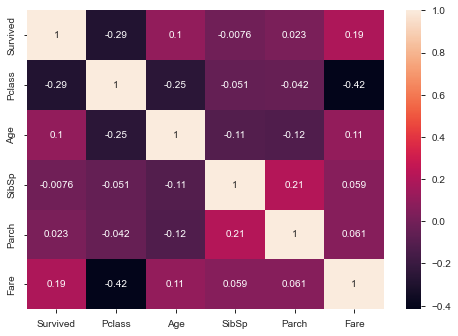

In [23]:
sns.heatmap(cr, annot=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

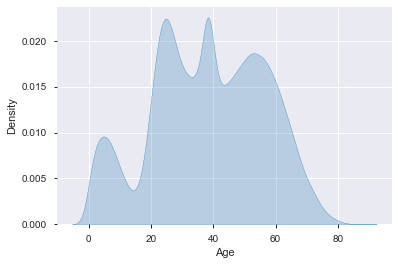

In [24]:
plt.figure(figsize=(6,4))
#sns.displot(data['Age'], binwidth=3)
sns.kdeplot(data=data['Age'], shade=True)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

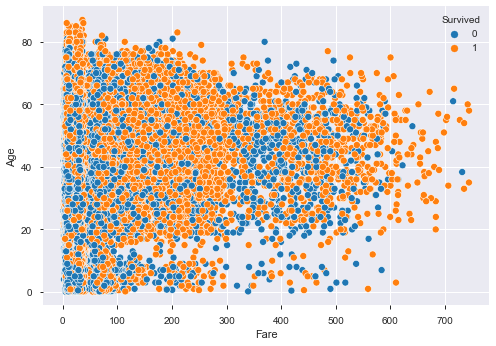

In [25]:
sns.scatterplot(x=data_titanic['Fare'], y=data_titanic['Age'], hue=data['Survived'])

In [29]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


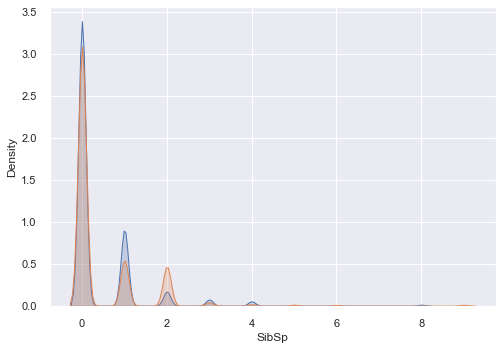

In [54]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns.kdeplot(data=data['SibSp'], shade=True)
sns.kdeplot(data=data['Parch'], shade=True)
plt.legend() 
plt.show()

<AxesSubplot:xlabel='Parch', ylabel='SibSp'>

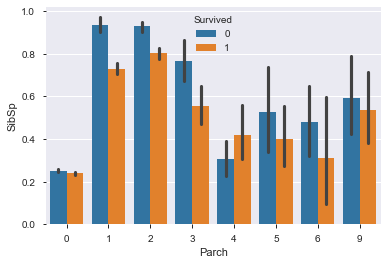

In [40]:
sns.barplot(x="Parch", y="SibSp", data=data_titanic, hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

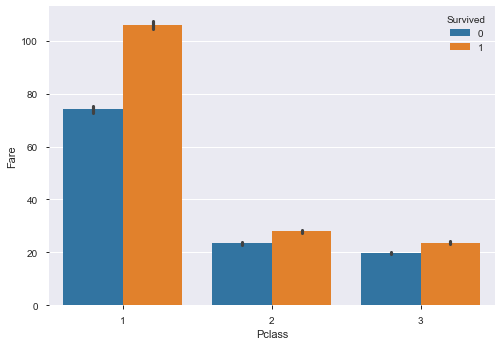

In [46]:
sns.barplot(x="Pclass", y="Fare", hue="Survived", data=data_titanic)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

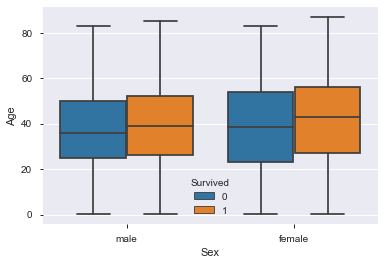

In [83]:
sns.boxplot(x=data_titanic['Sex'], y=data_titanic['Age'], hue=data['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

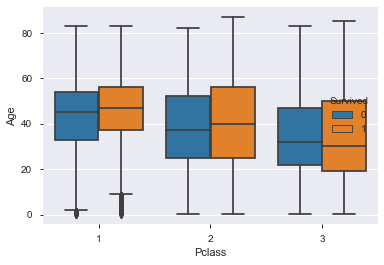

In [50]:
sns.boxplot(x=data_titanic['Pclass'], y=data_titanic['Age'], hue=data['Survived'])


# Summary

 Data before exploration had missing values,'Cabin'- 30% of not null data.Missing 'Age' was replaced with Age.mean(). 'Sibsp' and 'Parch' have high correlation.
 On Scatterplot 'Fare'-'Age' we see that between 'Fare' 100-300
 big percent of survived peoples.We see that Pclass=1 corresponds for more 'Fare', and difference between surv/not-surv more than for 2,3 p classes(barplot).